In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

from sklearn import cluster, datasets
from sklearn.preprocessing import StandardScaler
from matplotlib.lines import Line2D
import pickle
from pickle import dump
from pickle import load

In [2]:
data = pd.read_csv("Big_Play_list")
data.columns

Index(['Unnamed: 0', 'song_name', 'name', 'song_id', 'popularity',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms',
       'time_signature'],
      dtype='object')

In [3]:
data.drop(["Unnamed: 0"],axis = 1,inplace=True)

In [4]:
#data

In [5]:
data["type"].value_counts()

audio_features    16724
Name: type, dtype: int64

In [6]:
data.drop_duplicates(inplace =True)

In [7]:
data.shape

(16488, 22)

In [8]:
data.dropna(inplace = True)

In [9]:
data = data.reset_index(drop = True)

In [10]:
data.head()

,song_name,name,song_id,popularity,danceability,energy,key,loudness,mode,speechiness,...,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,Pretty Pimpin,Kurt Vile,3l9eg9RtisizG12a1D6nZl,0,0.566,0.664,8,-9.081,1,0.0281,...,0.0903,0.764,91.117,audio_features,3l9eg9RtisizG12a1D6nZl,spotify:track:3l9eg9RtisizG12a1D6nZl,https://api.spotify.com/v1/tracks/3l9eg9Rtisiz...,https://api.spotify.com/v1/audio-analysis/3l9e...,298760,4
1,I Need My Girl,The National,50M7nY1oQuNHecs0ahWAtI,68,0.520,0.436,0,-11.508,0,0.0355,...,0.1230,0.114,126.053,audio_features,50M7nY1oQuNHecs0ahWAtI,spotify:track:50M7nY1oQuNHecs0ahWAtI,https://api.spotify.com/v1/tracks/50M7nY1oQuNH...,https://api.spotify.com/v1/audio-analysis/50M7...,245240,4
2,Strange,Galaxie 500,2TTAPkrGQQOZkaUTUlt21Q,48,0.312,0.844,7,-7.085,1,0.0511,...,0.0793,0.626,97.039,audio_features,2TTAPkrGQQOZkaUTUlt21Q,spotify:track:2TTAPkrGQQOZkaUTUlt21Q,https://api.spotify.com/v1/tracks/2TTAPkrGQQOZ...,https://api.spotify.com/v1/audio-analysis/2TTA...,199467,4
3,Todeswalzer,Windir,7BvcpEdO7PUDGGSER1S9LA,36,0.236,0.870,2,-4.747,0,0.0579,...,0.3050,0.186,167.845,audio_features,7BvcpEdO7PUDGGSER1S9LA,spotify:track:7BvcpEdO7PUDGGSER1S9LA,https://api.spotify.com/v1/tracks/7BvcpEdO7PUD...,https://api.spotify.com/v1/audio-analysis/7Bvc...,295131,4
4,Blinding Lights,The Weeknd,0VjIjW4GlUZAMYd2vXMi3b,93,0.514,0.730,1,-5.934,1,0.0598,...,0.0897,0.334,171.005,audio_features,0VjIjW4GlUZAMYd2vXMi3b,spotify:track:0VjIjW4GlUZAMYd2vXMi3b,https://api.spotify.com/v1/tracks/0VjIjW4GlUZA...,https://api.spotify.com/v1/audio-analysis/0VjI...,200040,4


In [11]:
num_data = data.select_dtypes(exclude = "object")
num_data.columns

Index(['popularity', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature'],
      dtype='object')

In [12]:
# ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
#        'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
#        'type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms',
#        'time_signature']

In [13]:
cat_data = data.select_dtypes(include = "object")
cat_data.columns

Index(['song_name', 'name', 'song_id', 'type', 'id', 'uri', 'track_href',
       'analysis_url'],
      dtype='object')

In [14]:
cat_data.drop(['type', 'id'],axis =1, inplace =True)

C:\Users\Denish\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


# Scaling of numeric values

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(num_data)
X_scaled = scaler.transform(num_data)

# Now, all features will have the same weight.
pd.DataFrame(X_scaled,columns=num_data.columns).head()

,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,-1.056341,0.182843,0.003752,0.771950,-0.297287,0.749830,-0.627398,-0.493716,0.560196,-0.670570,1.202875,-1.055925,0.533118,0.212745
1,1.479847,-0.068980,-0.958342,-1.464137,-0.893285,-1.333635,-0.536783,2.065156,-0.281875,-0.470583,-1.372205,0.161442,0.016622,0.212745
2,0.733909,-1.207655,0.763301,0.492439,0.192869,0.749830,-0.345758,-0.536795,-0.429298,-0.737844,0.656166,-0.849569,-0.425112,0.212745
3,0.286346,-1.623709,0.873013,-0.905115,0.767011,-1.333635,-0.262490,-0.801196,2.754004,0.642496,-1.086965,1.617710,0.498096,0.212745
4,2.412269,-0.101826,0.282254,-1.184626,0.475520,0.749830,-0.239224,-0.796393,-0.510047,-0.674240,-0.500639,1.727823,-0.419582,0.212745


In [16]:
X_scaled.shape

(16477, 14)

In [46]:
import pickle
pickle.dump(scaler, open('scaler_new.p', 'wb'))


# Choosing k

C:\Users\Denish\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Denish\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Denish\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Denish\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warni

Text(0.5, 1.0, 'Elbow Method showing the optimal k')

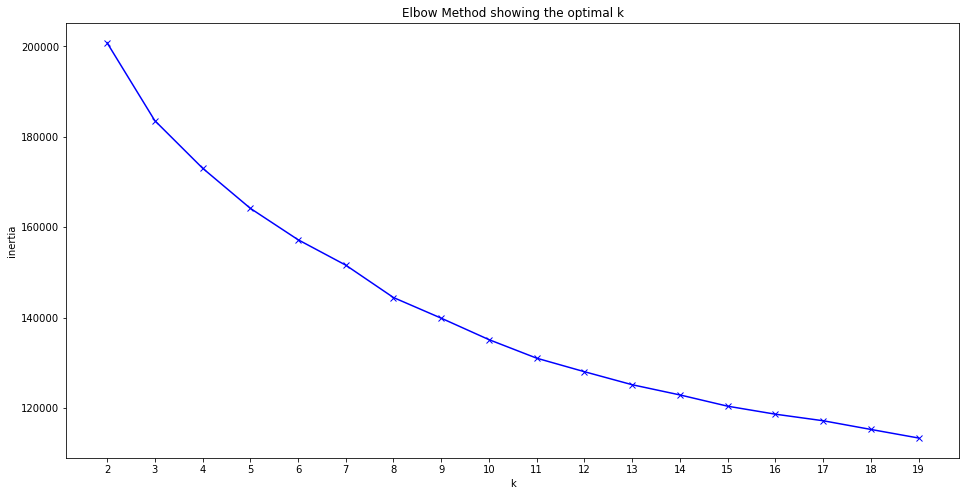

In [28]:
import numpy as np
K = range(2, 20)
inertia = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

C:\Users\Denish\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Denish\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Denish\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Denish\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warni

Text(0.5, 1.0, 'Slhouette score showing the optimal k')

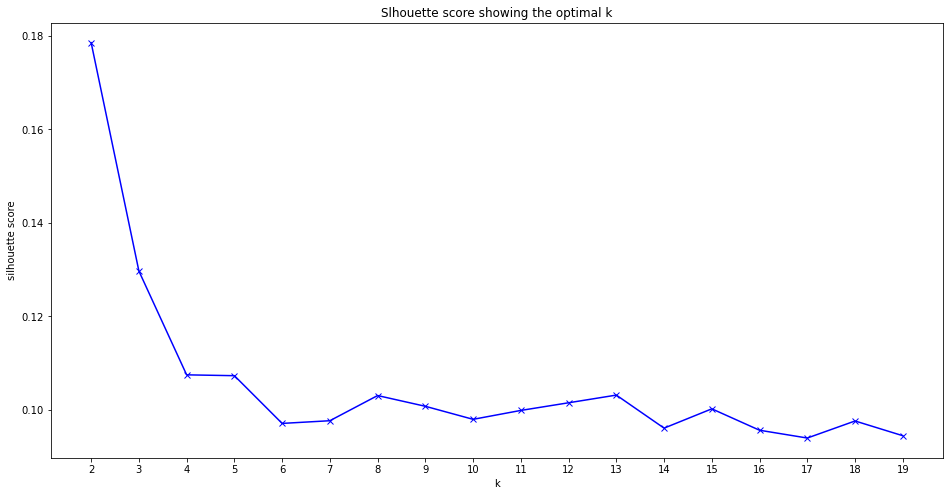

In [29]:
from sklearn.metrics import silhouette_score
K = range(2, 20)
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_scaled)
    silhouette.append(silhouette_score(X_scaled, kmeans.predict(X_scaled)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Slhouette score showing the optimal k')

In [30]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=13, random_state=1234)
kmeans.fit(X_scaled)

C:\Users\Denish\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=13, random_state=1234)

In [31]:
# Predicting / assigning the clusters:
clusters = kmeans.predict(X_scaled)

# Check the size of the clusters
#pd.Series(clusters).value_counts().sort_index()
clusters

array([ 9,  2, 12, ...,  9, 12,  3])

In [32]:
# pickling the K clustering
# Save a model to reuse it


# pickle the model (always use parameret 'wb') -> read documentation about it

pickle.dump(kmeans, open("kmeans.pkl","wb"))
#model_for_new_song = load(open('kmeans.pkl','rb'))

# unpickle the model (without having to train it) (parameter 'rb' necessary) -> read documentation about it
#original_LR_model = pickle.load(open('knn_boston.p','rb'))

# you can specify directory to pickle
# you can pickle datasets, transformers, functions, or anything that have data structure.

In [33]:
cat_data.isna().sum()

song_name       0
name            0
song_id         0
uri             0
track_href      0
analysis_url    0
dtype: int64

In [34]:
clusters_num = pd.Series(clusters)

In [35]:
clusters_num.isna().sum()

0

In [36]:
cat_data_new = cat_data[["song_name","name"]]


In [37]:
cat_data.shape

(16477, 6)

In [38]:
cat_data_new.isna().sum()

song_name    0
name         0
dtype: int64

In [39]:
len(clusters)

16477

In [40]:
clusters_num.shape

(16477,)

In [41]:
cat_data_new

,song_name,name
0,Pretty Pimpin,Kurt Vile
1,I Need My Girl,The National
2,Strange,Galaxie 500
3,Todeswalzer,Windir
4,Blinding Lights,The Weeknd
...,...,...
16472,London Calling - Remastered,The Clash
16473,Low Rider,War
16474,Flower,Moby
16475,Brighter Than Gold,The Cat Empire


In [42]:
data_cluster = pd.concat([cat_data_new,clusters_num],axis = 1)

In [43]:
data_cluster = data_cluster.rename(columns ={0:"Num_cluster"})


In [45]:
data_cluster.to_csv("Fianl_data_K_cluster.csv")

In [ ]:
# # Save a model to reuse it
# # This is my model
# KNN = KNeighborsRegressor(n_neighbors=3)
# KNN.fit(X_train, y_train)

# # pickle the model (always use parameret 'wb') -> read documentation about it
# import pickle
# pickle.dump(KNN, open('knn_boston.p', 'wb'))

# # pickle the X_test and y_test
# X_test.to_pickle('xtest.p')
# y_test.to_pickle('ytest.p')

# # unpickle X_test and y_test
# X_test = pd.read_pickle('xtest.p')
# y_test = pd.read_pickle('ytest.p')

# # unpickle the model (without having to train it) (parameter 'rb' necessary) -> read documentation about it
# original_LR_model = pickle.load(open('knn_boston.p','rb'))

# # you can specify directory to pickle
# # you can pickle datasets, transformers, functions, or anything that have data structure.